In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Mon May 20 03:11:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         

In [29]:
# Change to the correct directory
%cd /content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


In [30]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


In [31]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [32]:
from ultralytics import YOLO

from IPython.display import display, Image

In [33]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HpsdifEv69t09fhrCAA7")
project = rf.workspace("flowersdetection").project("flowers_segmentation")
version = project.version(19)
dataset = version.download("yolov8")

/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to flowers_segmentation-19 in yolov8:: 100%|██████████| 14231/14231 [01:54<00:00, 123.93it/s]


In [38]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection/datasets/flowers_segmentation-19/data.yaml epochs=30 imgsz=800 plots=True


/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection/datasets/flowers_segmentation-19/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=Fa

In [35]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1716174899.900d73ed00eb.6822.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7580.jpg  weights
P_curve.png					    train_batch7581.jpg
PR_curve.png					    train_batch7582.jpg


/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


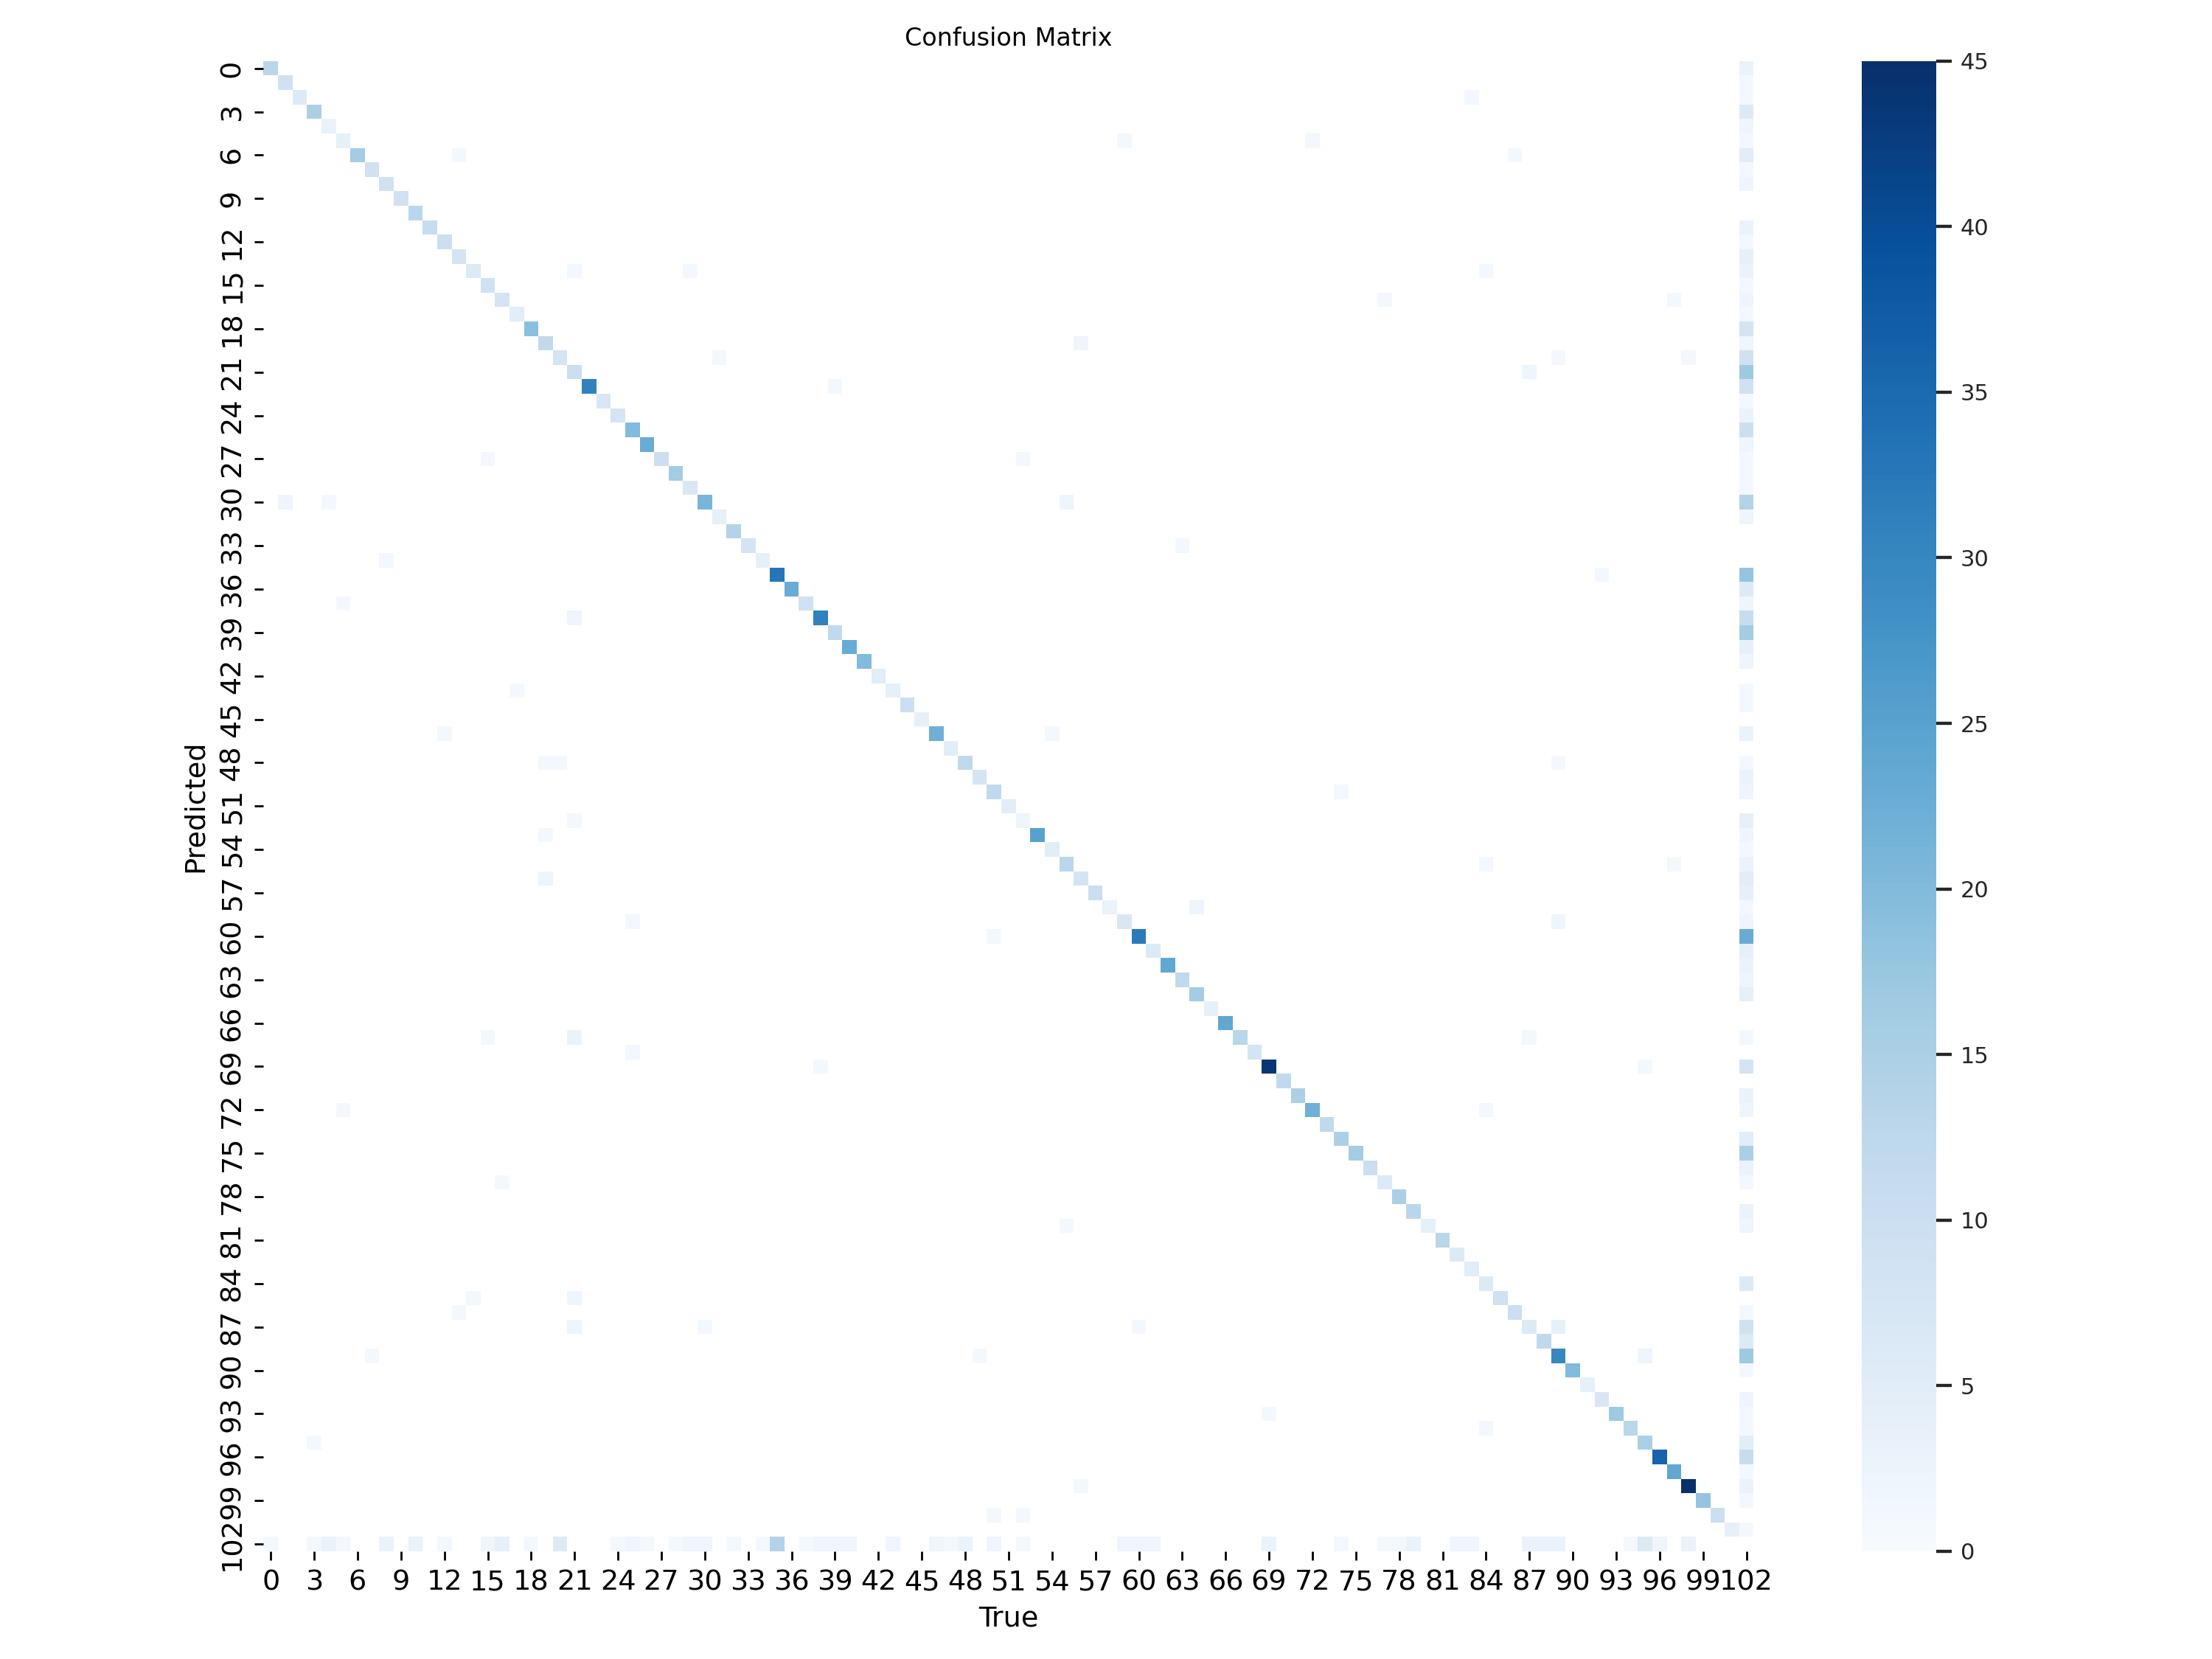

In [42]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


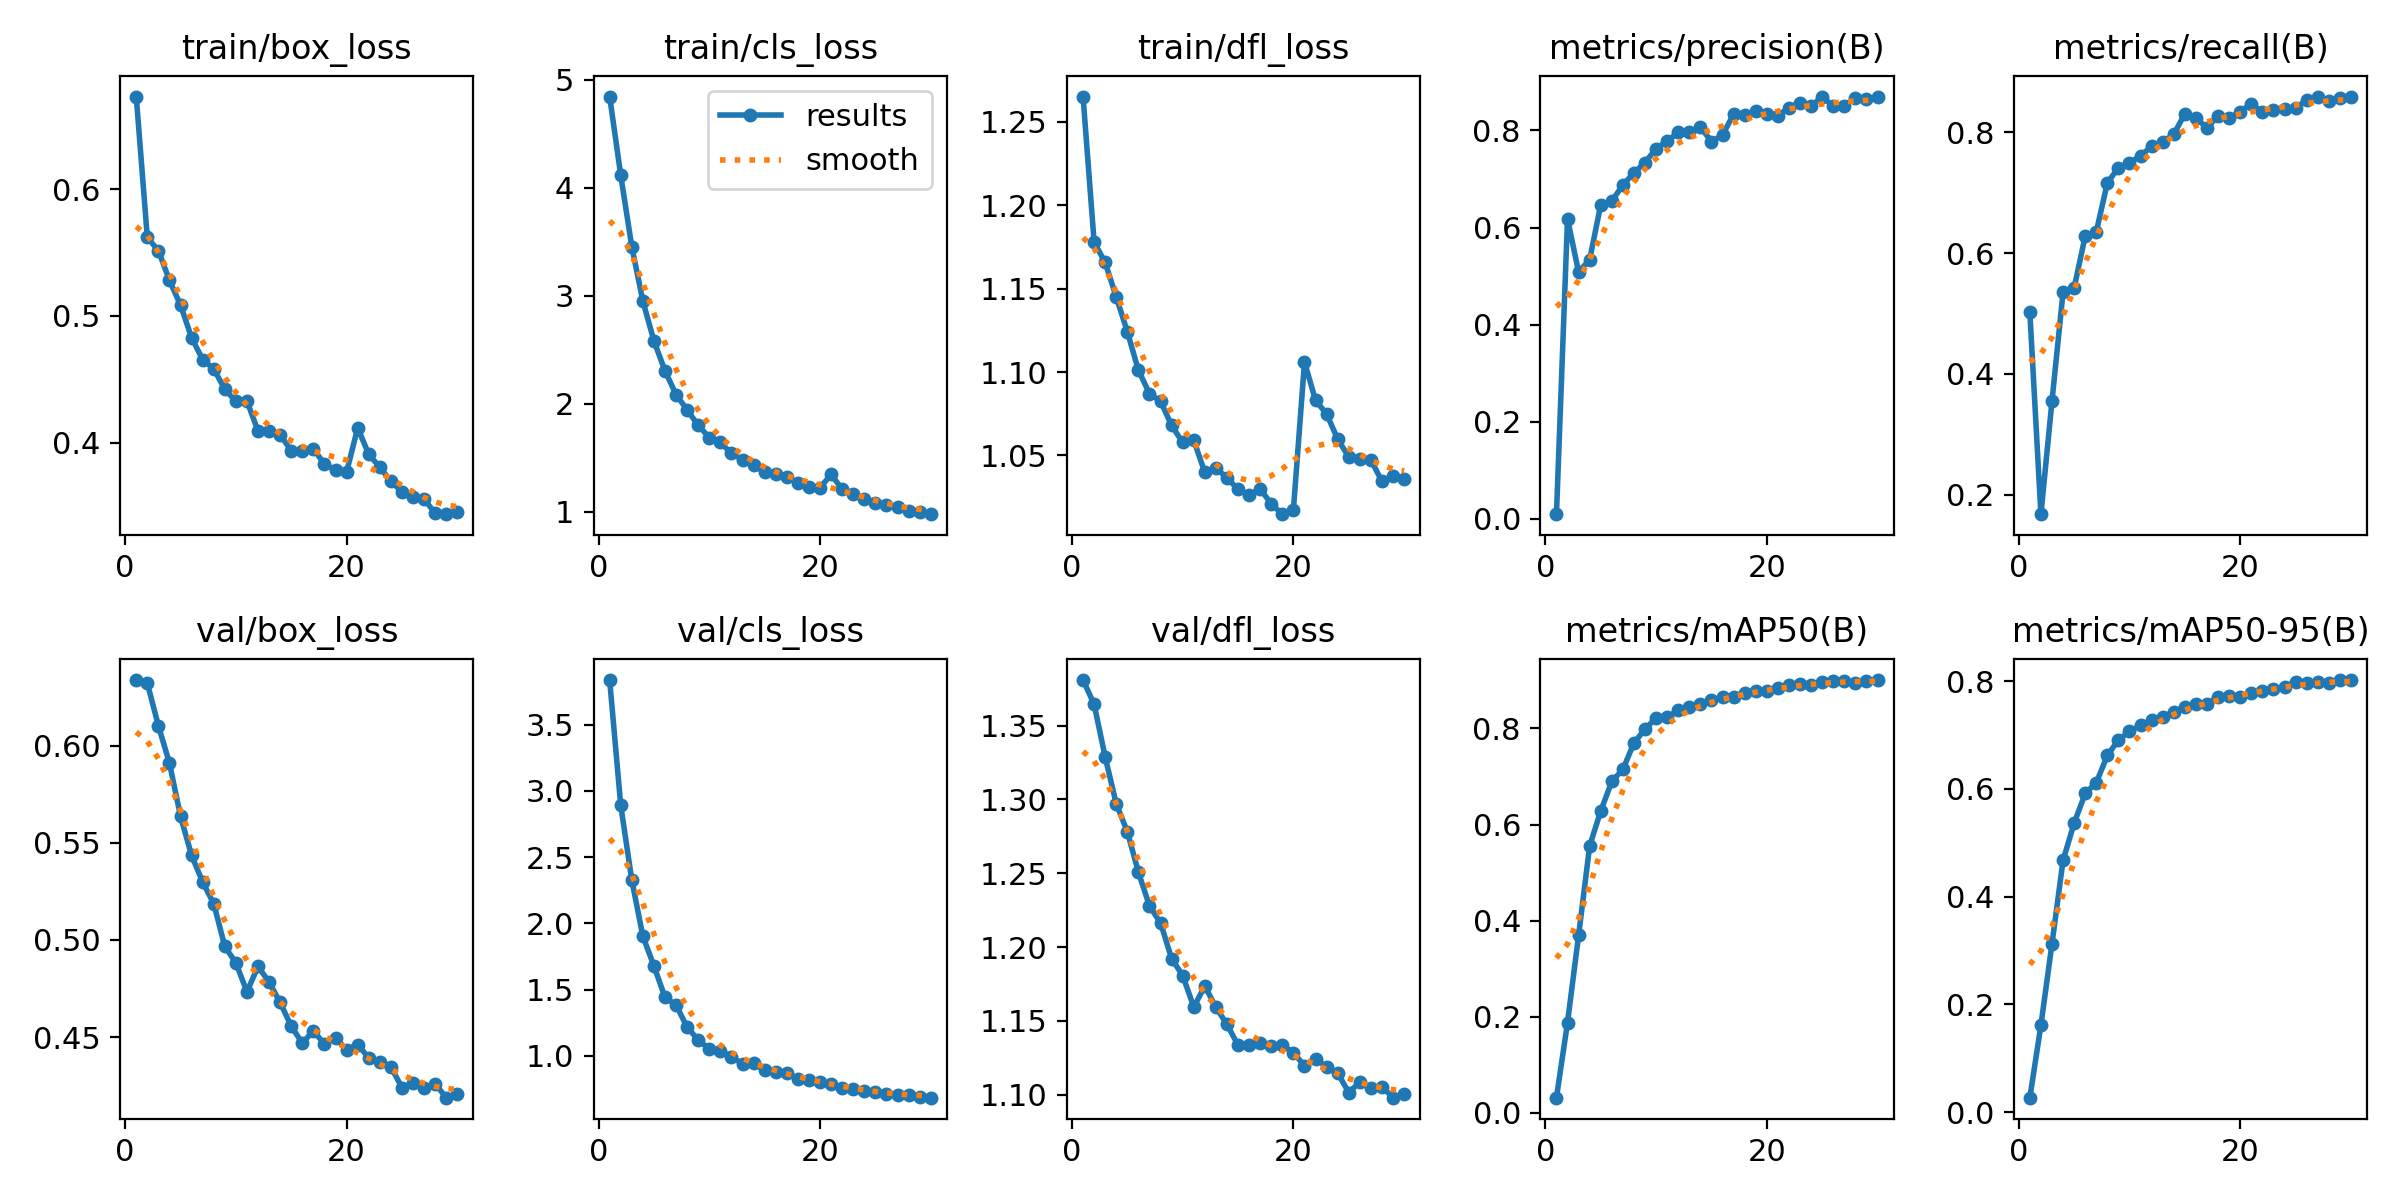

In [43]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)


/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


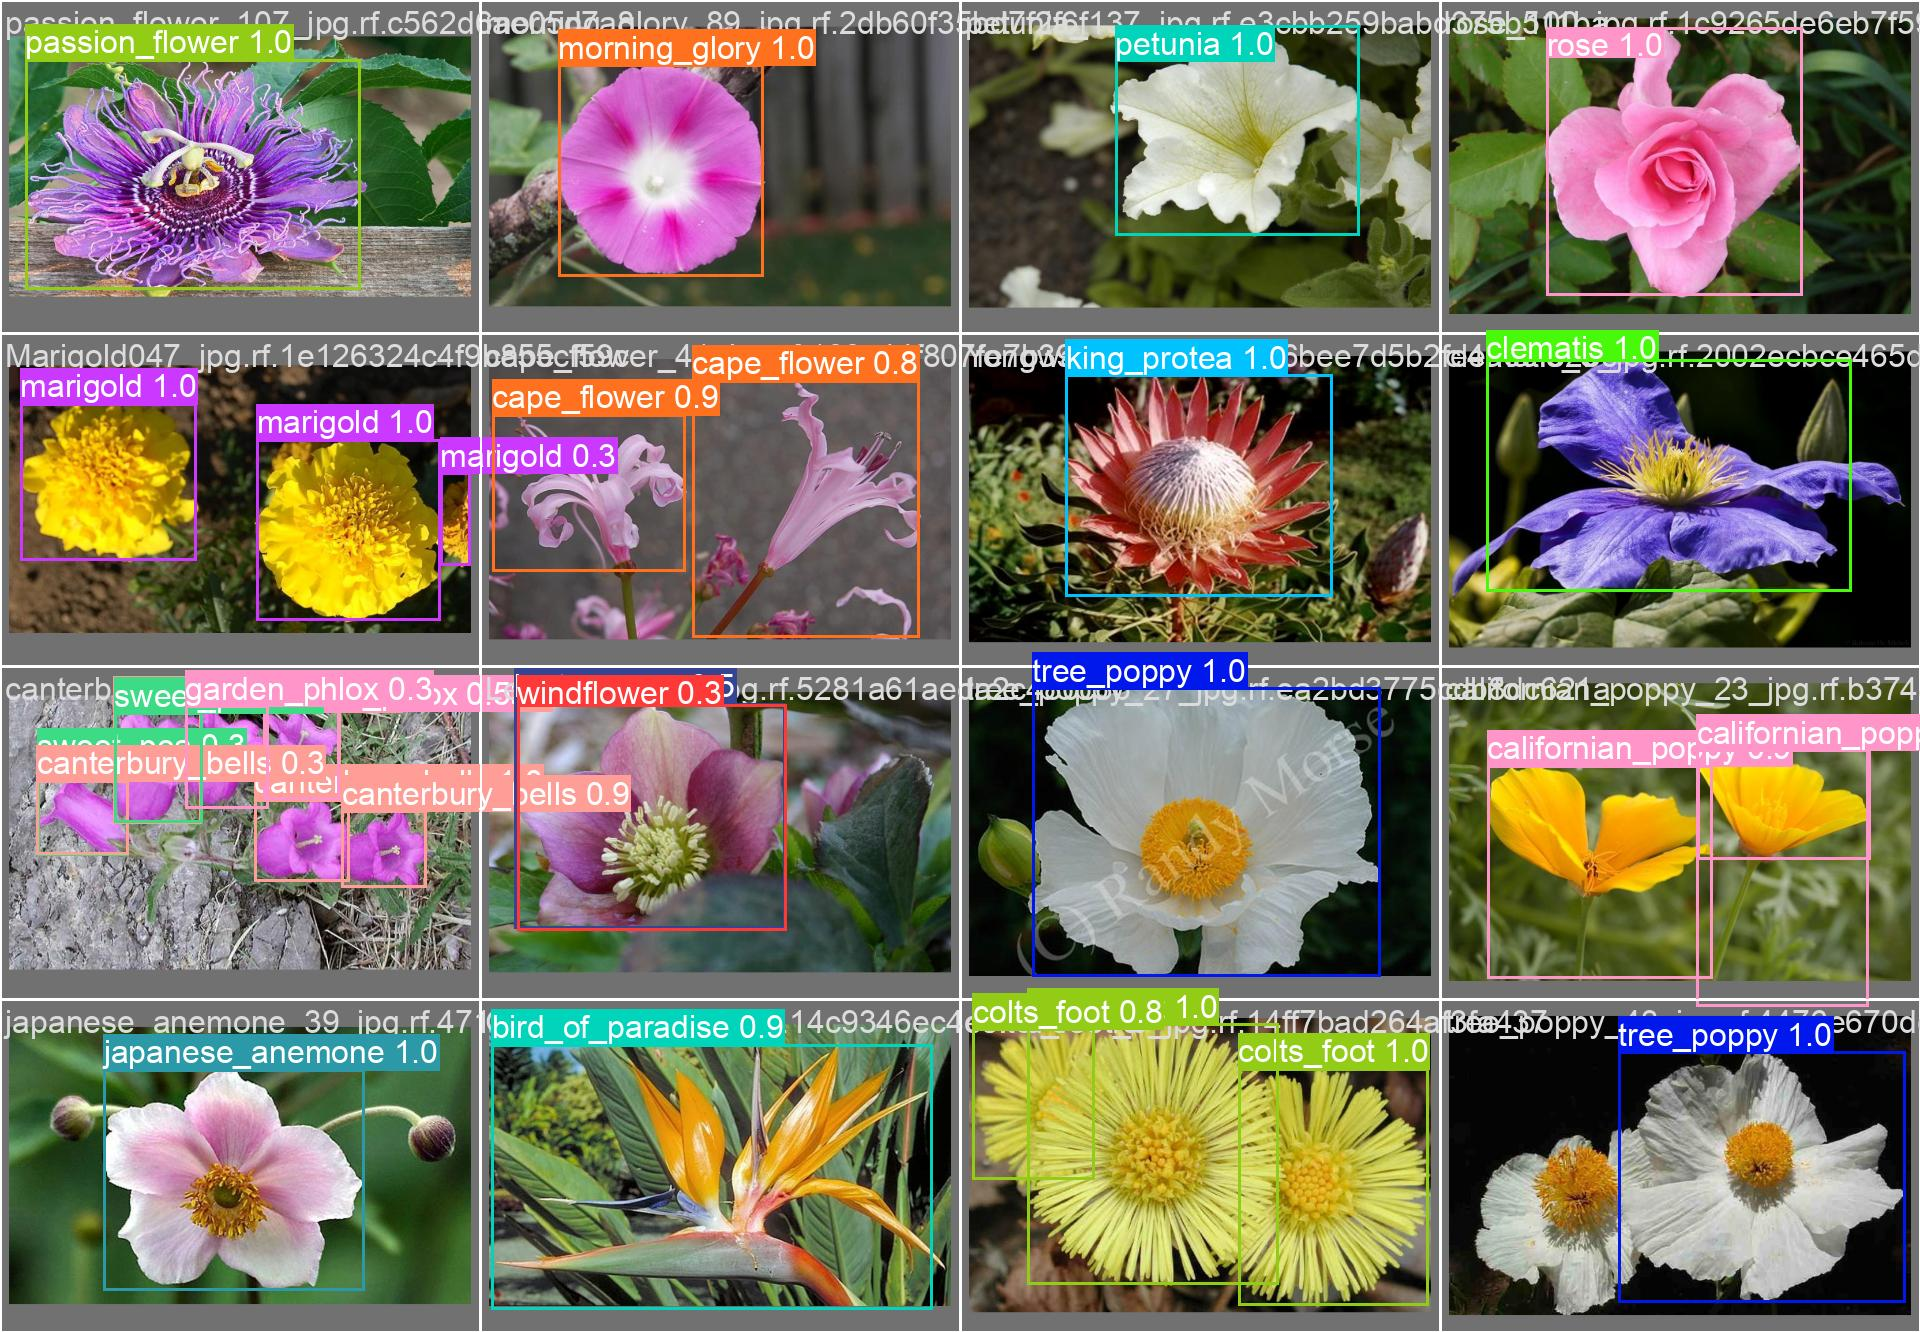

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)


In [47]:
%cd {HOME}
!cp {HOME}/runs/detect/train/weights/best.pt .

/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection


In [48]:
%cd {HOME}
!ls

/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection
best.pt  datasets  runs  yolov8n.pt


In [49]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3341330 parameters, 0 gradients, 9.6 GFLOPs
val: Scanning /content/drive/MyDrive/practice/Artificial_Intelligence/FlowerDetection/datasets/flowers_segmentation-19/valid/labels.cache... 1058 images, 0 backgrounds, 0 corrupt: 100% 1058/1058 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 67/67 [00:29<00:00,  2.27it/s]
                   all       1058       1522      0.884      0.842      0.901      0.803
      alpine_sea_holly       1058         14      0.861      0.887      0.918       0.66
             